# (Visualizing Ford GoBike System Data (January 2019)
## by Mashael AlSaadan

## Investigation Overview

In this investigation, I looked at the Ford GoBike users' behaviours and characteristics. My main focus was on the time attribute (duration, day and hour).

## Dataset Overview

This presentation discuss the Ford GoBike trips' public data, that contains 192082 bike trip for January 2019. The attributes that were provided with are (start, end) time, station id, station name, station latitude and longitude, bike id, user type (customer or subscriber) and whether the subscriber is a member of bike share for all membership. I derived additional attributes from the ones that were provided: the start day and hour, duration in the unit of hours and distance in the unit of miles.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [20]:
# load in the dataset into a pandas dataframe
ford_clean = pd.read_csv('ford_clean.csv')

In [21]:
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192082 entries, 0 to 192081
Data columns (total 18 columns):
duration_sec               192082 non-null int64
start_time                 192082 non-null object
end_time                   192082 non-null object
start_station_id           191834 non-null float64
start_station_name         191834 non-null object
start_station_latitude     192082 non-null float64
start_station_longitude    192082 non-null float64
end_station_id             191834 non-null float64
end_station_name           191834 non-null object
end_station_latitude       192082 non-null float64
end_station_longitude      192082 non-null float64
bike_id                    192082 non-null int64
user_type                  192082 non-null object
bike_share_for_all_trip    192082 non-null object
start_day                  192082 non-null object
start_hour                 192082 non-null object
duration_min               192082 non-null int64
distance_miles             192082 no

In [34]:
# 1. start,end time => datetime
ford_clean['start_time'] = pd.to_datetime(ford_clean['start_time'], format='%Y-%m-%d %H:%M:%S.%f')
ford_clean['end_time'] = pd.to_datetime(ford_clean['end_time'], format='%Y-%m-%d %H:%M:%S.%f')

# 2. station id,name, bike id => object
ford_clean['start_station_id'] = ford_clean['start_station_id'].astype(str)
ford_clean['start_station_name'] = ford_clean['start_station_name'].astype(str)
ford_clean['end_station_id'] = ford_clean['end_station_id'].astype(str)
ford_clean['end_station_name'] = ford_clean['end_station_name'].astype(str)
ford_clean['bike_id'] = ford_clean['bike_id'].astype(str)

# 3. user type & bike share & start hour & start day => category
ford_clean['user_type'] = ford_clean['user_type'].astype('category')

ford_clean['bike_share_for_all_trip'] = ford_clean['bike_share_for_all_trip'].astype('category')

hours = ['12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM', '08 AM', '09 AM', '10 AM', '11 AM',
        '12 PM', '01 PM', '02 PM', '03 PM', '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM']
hours_start = pd.api.types.CategoricalDtype(ordered = True, categories = hours)
ford_clean['start_hour'] = ford_clean['start_hour'].astype(hours_start)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_of_week = pd.api.types.CategoricalDtype(ordered = True, categories = days)
ford_clean['start_day'] = ford_clean['start_day'].astype(days_of_week)

In [7]:
# Setting base color
base_color = sb.color_palette()[0]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Ford GoBike Usage by Day

First, we have investigated the usage of Ford GoBike per days. We can see that the usage increases during weekdays and decreases in the weekends, this suggests that the bikes mainly used for daily school/work commute.

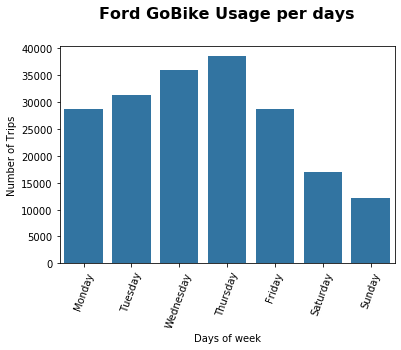

In [25]:
# Usage by days
sb.countplot(data = ford_clean, x = 'start_day', color = base_color);
plt.xticks(rotation = 70);
plt.title('Ford GoBike Usage per days', y=1.1, fontsize=16, fontweight='bold');
plt.xlabel('Days of week')
plt.ylabel('Number of Trips');

## FordGoBike Usage by Hours

In the following, we have diggen deeper to look at the usage by hours. As it showsn, the peak of use is at 8 am and 5 pm. The result conforms to our theory that the system is used mainly by school/work commuters since these hours are the typical working hours in the US.

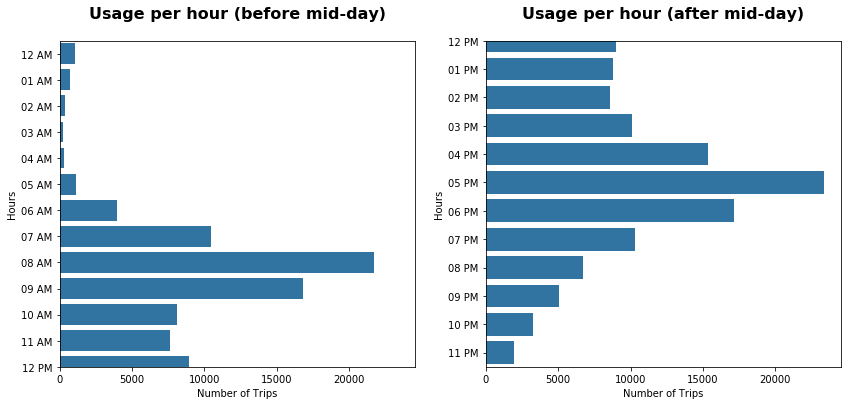

In [26]:
# Usage by hour
plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
sb.countplot(data = ford_clean, y = 'start_hour', color=base_color); 
plt.ylim(12);
plt.title('Usage per hour (before mid-day)', y=1.05, fontsize=16, fontweight='bold');
plt.ylabel('Hours')
plt.xlabel('Number of Trips');

plt.subplot(1,2,2)
sb.countplot(data = ford_clean, y = 'start_hour', color=base_color); 
plt.ylim(top=12);
plt.title('Usage per hour (after mid-day)', y=1.05, fontsize=16, fontweight='bold');
plt.ylabel('Hours')
plt.xlabel('Number of Trips');

## Hourly Usage during the Weekdays for Customers and Subscribers

The following heatmap summarizes the past analysis with user type attribute, we have come to the conclusion that:
1. Subscribers are those who use the bikes as daily school/work commute.
2. Customers are considered as occational riders and tourists.

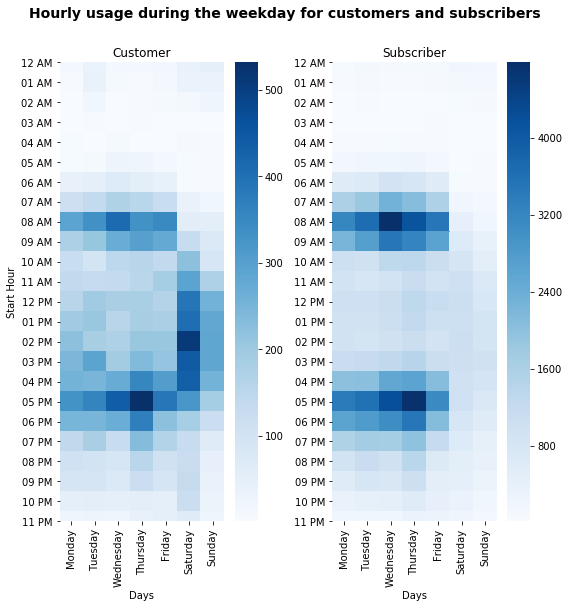

In [30]:
# Hourly usage during days of the week

plt.figure(figsize=(8,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', y = 1.05, fontsize=14, fontweight='semibold')

# Customers heatmap
plt.subplot(1, 2, 1)
customer_df = ford_clean.query('user_type == "Customer"').groupby(["start_hour", "start_day"])["bike_id"].size().reset_index()
customer_df = customer_df.pivot("start_hour", "start_day", "bike_id")
sb.heatmap(customer_df, cmap="Blues")

plt.title("Customer", y=1.1)
plt.xlabel('Days')
plt.ylabel('Start Hour')

# Subscribers heatmap
plt.subplot(1, 2, 2)
sub_df = ford_clean.query('user_type == "Subscriber"').groupby(["start_hour", "start_day"])["bike_id"].size().reset_index()
sub_df = sub_df.pivot("start_hour", "start_day", "bike_id")
sb.heatmap(sub_df, cmap="Blues")

plt.title("Subscriber", y=1.1)
plt.xlabel('Days')
plt.ylabel('');
plt.tight_layout()

## Summary
In this project, we have gone through all the aspects of the visualization process. The results of this project could help Ford GoBike company in increasing their sales and improving their services to gain more customer satisfactions. A few features could be provided to improve the analysis and maximize the benefit of this project, such as age and gender to target a specific audience.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!